In [2]:
import pandas as pd

df = pd.read_csv("../../data/BTC_Tweets_Updated.csv")
df.head()

,id,Date,Tweet,Screen_name,Source,Link,Sentiment,sent_score,New_Sentiment_Score,New_Sentiment_State,BERT Labels
0,0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I h...",myresumerocket,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['neutral'],0.0,0.000000,0.0,1
1,1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @Pr...,BitMocro,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" ...",['neutral'],0.0,0.000000,0.0,0
2,2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #block...,hojachotopur,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],1.0,0.136364,1.0,0
3,3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,[],"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",['positive'],1.0,0.400000,1.0,0
4,4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce th...,aditzgraha,[],"<a href=""http://twitter.com/download/android"" ...",['positive'],1.0,0.468182,1.0,0


In [8]:
df.Sentiment.value_counts()

['positive']    22937
['neutral']     21932
['negative']     5983
Name: Sentiment, dtype: int64

<Axes: >

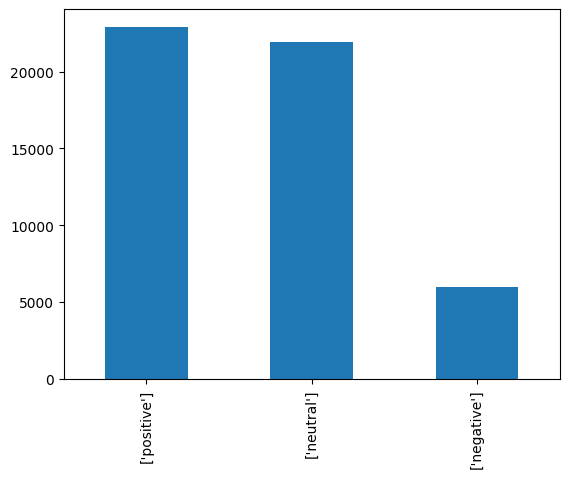

In [11]:
df.Sentiment.value_counts().plot(kind="bar")

In [15]:
def sentiment_score_to_name(score: float):
    if score > 0:
        return "Positive"
    elif score < 0:
        return "Negative"
    return "Neutral"

dataset_data = [
    {
        "instruction": "Detect the sentiment of the tweet.",
        "input": row_dict["Tweet"],
        "output": sentiment_score_to_name(row_dict["New_Sentiment_State"]) 
    }

    for row_dict in df.to_dict(orient="records")
]

dataset_data[0]

{'instruction': 'Detect the sentiment of the tweet.',
 'input': "RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",
 'output': 'Neutral'}

In [ ]:
import json
with open("../../data/alpaca-bitcoin-sentiment-dataset.json", "w") as f:
    json.dump(dataset_data, f)